In [40]:
# import the required libraries
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pdpf

In [41]:
# load the dataset
df = pd.read_csv('ai4i2020.csv')

In [42]:
# top 5 values in the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [43]:
# bottom 5 values in dataset
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [44]:
# information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [45]:
# finding null values regarding the dataset
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [48]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)



In [49]:
df.head(10)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


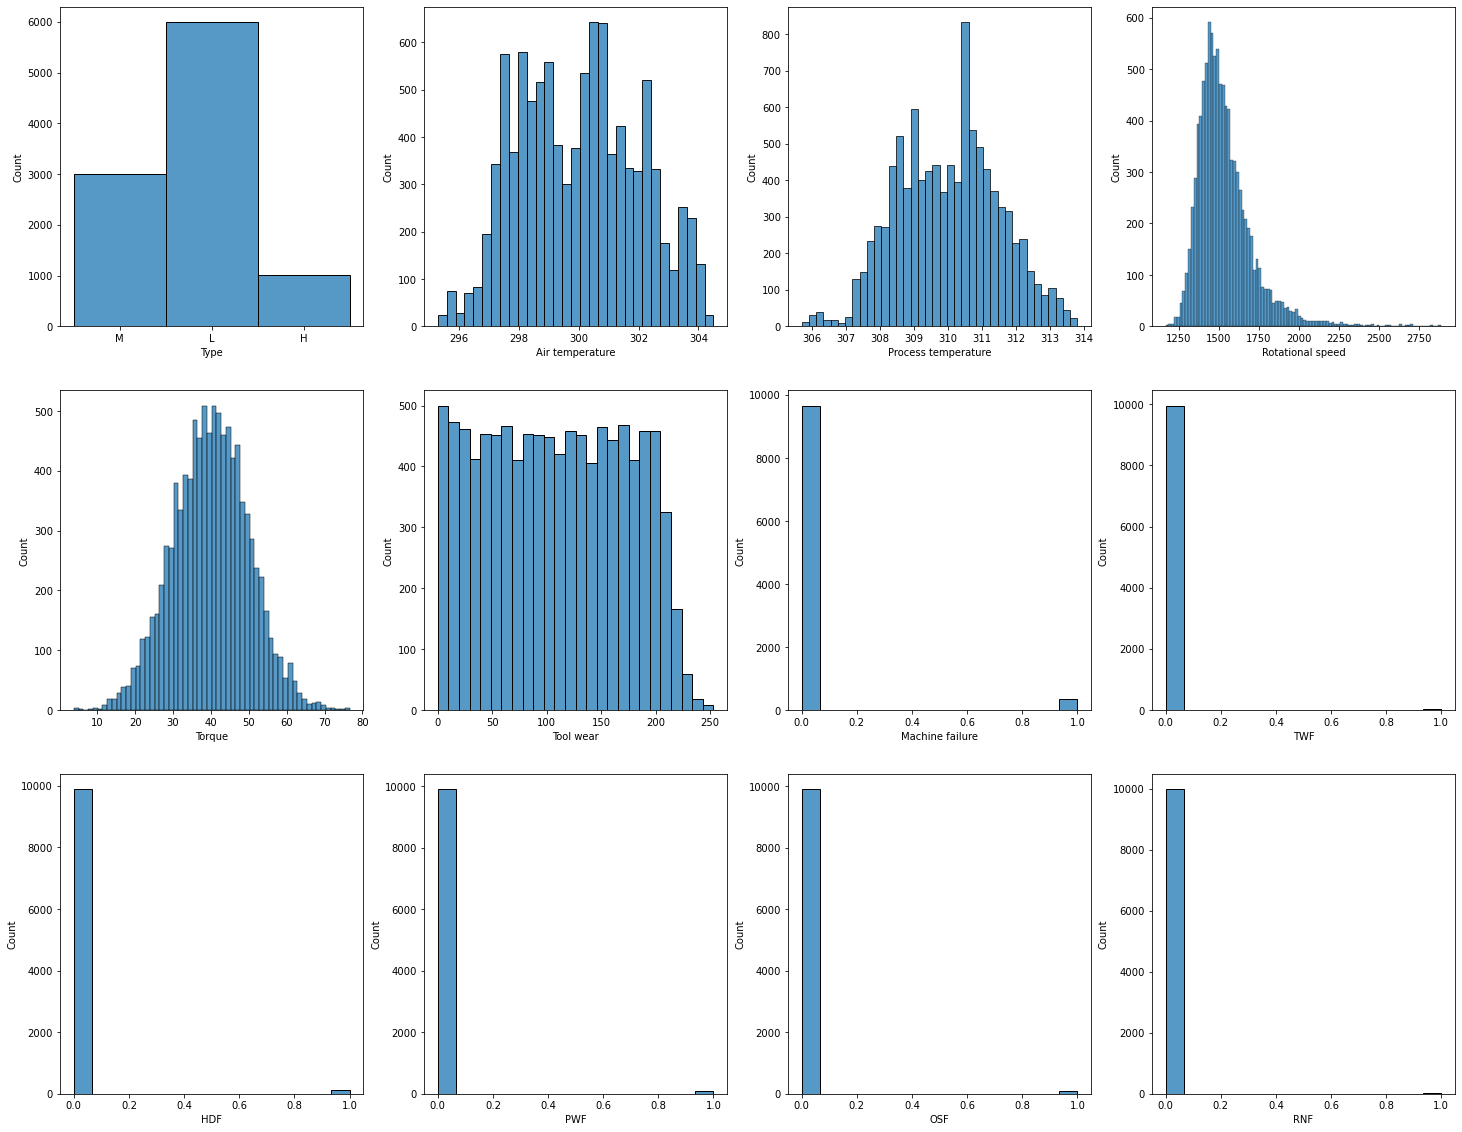

In [50]:
#Plotting the distribution for each attribute
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

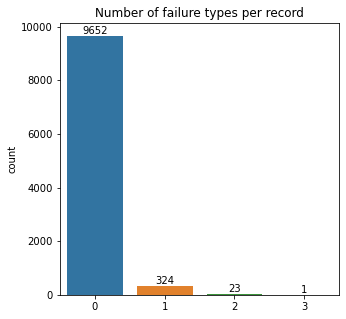

In [51]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

In [52]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

Text(0.5, 1.0, 'Count of different failure types')

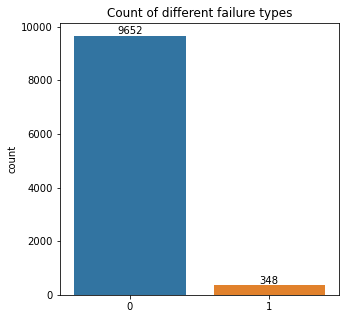

In [53]:
failure_types = df.loc[:, ['Machine failure']]
rows_sum = failure_types.sum(axis=1)

# Create a count plot
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)

# Annotate the count of each bar
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')

# Set the title of the plot
ax.set_title('Count of different failure types')


In [54]:
# deriving a new attribute using the formula power = torque x rotational speed
df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)

<AxesSubplot:xlabel='Power', ylabel='Count'>

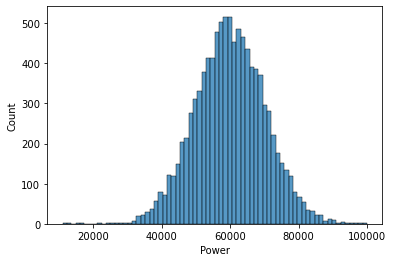

In [55]:
# Plotting the histogram of Power attribute
sns.histplot(df['Power'])

In [56]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

In [57]:
for column in df.columns:
    df[column] = df[column].astype(float)

In [58]:
# view columns data types
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

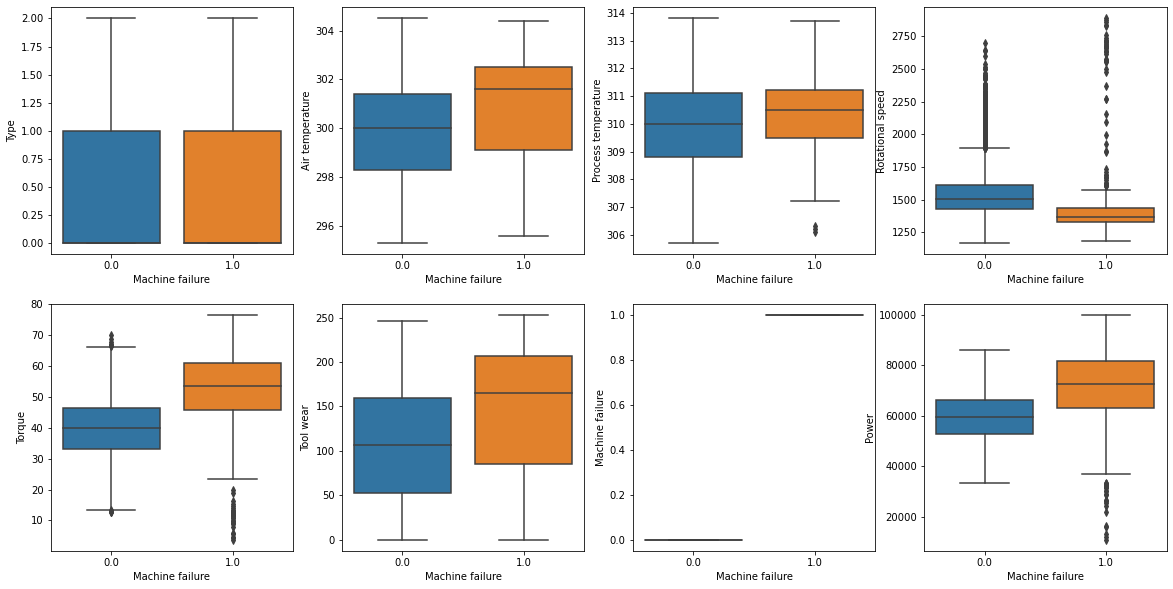

In [59]:
# Box and Whisker Plots for each attribute compared with Machine failure 
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(df.columns):
    sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i//4][i%4])

<AxesSubplot:>

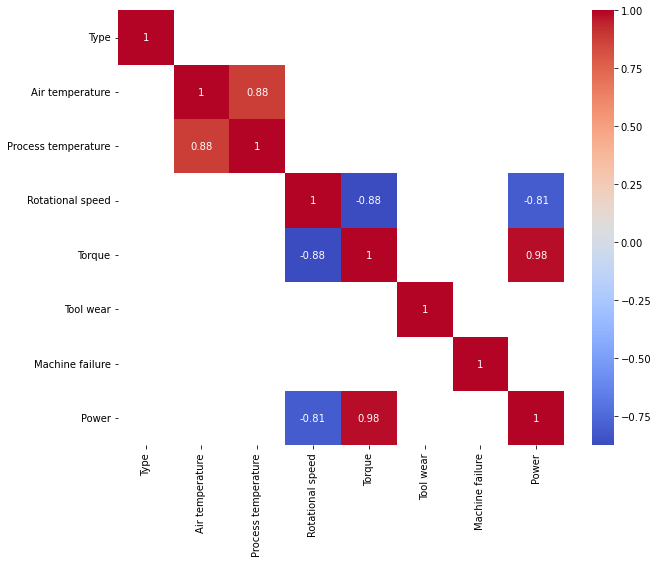

In [60]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

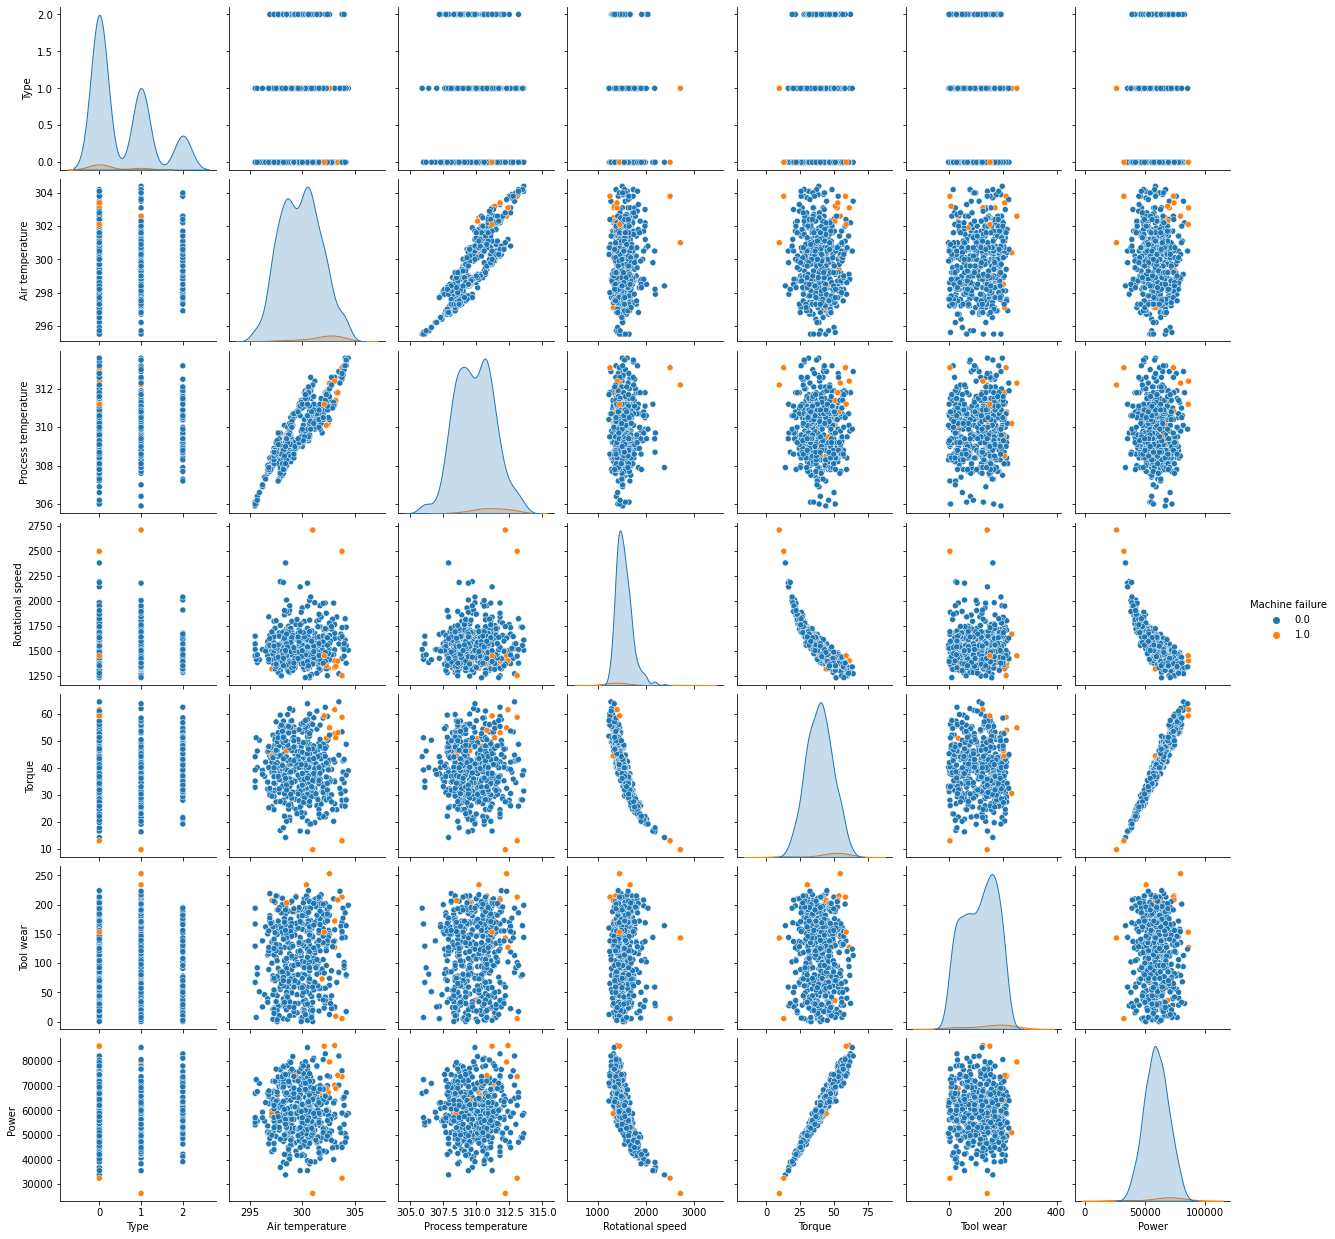

In [61]:
#a scatter plot matrix to display the relationships between attributes in the dataset
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

In [62]:
# features to use
X = df[["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"]]

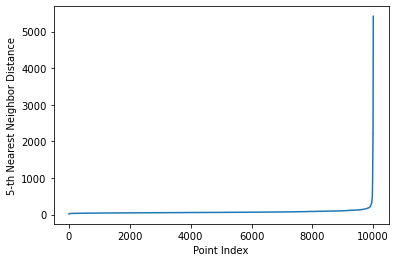

In [63]:
k = 5
# create the nearest neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
# get the distances and indices of the kth nearest neighbors for each point
distances, indices = nn.kneighbors(X)
kth_distances = distances[:, k-1]
# sort the kth nearest neighbor distances
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()


In [64]:
# find the model performance
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

In [65]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

In [66]:
# Split the data into training and test set
X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

(array([6756.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6756.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

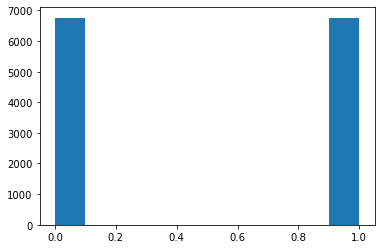

In [69]:
#Training set after sampling
plt.hist(y_train)

In [70]:
#Because the data is imbalanced, we oversample the training set
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

(array([6756.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6756.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

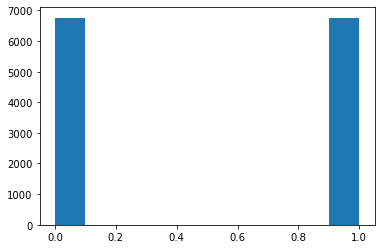

In [71]:
#Training set after sampling
plt.hist(y_train)

In [72]:
#create the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
oversample = RandomOverSampler(random_state=42)
knn = KNeighborsClassifier()
#define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}
#create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_neighbors': 2}


In [73]:
# Start the timer for model training
start = time.time()
#Considering 2 neighbors while making prediction
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
# Train the model on the training data
end_train = time.time()
# Make predictions on the test data
y_predictions = model.predict(X_test) 
# End the timer for prediction
end_predict = time.time()
# evaluate the model
log_scores("k-NN", y_test, y_predictions)

In [74]:
# Generating and printing a classification report based on the true labels (y_test) and predicted labels (y_predictions)
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2896
         1.0       0.40      0.38      0.39       104

    accuracy                           0.96      3000
   macro avg       0.69      0.68      0.69      3000
weighted avg       0.96      0.96      0.96      3000



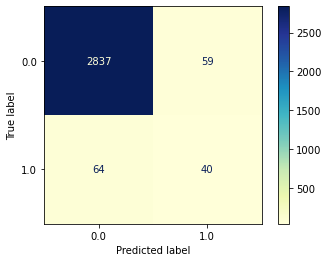

In [75]:
#Confusion matrix for the model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

In [78]:
log_scores("Decision Tree", y_test, y_predictions)

In [79]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2896
         1.0       0.40      0.69      0.51       104

    accuracy                           0.95      3000
   macro avg       0.70      0.83      0.74      3000
weighted avg       0.97      0.95      0.96      3000



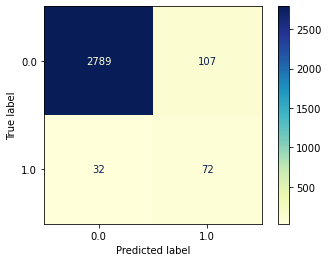

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

In [81]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

In [82]:
 print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2896
         1.0       0.16      0.73      0.26       104

    accuracy                           0.86      3000
   macro avg       0.57      0.80      0.59      3000
weighted avg       0.96      0.86      0.90      3000



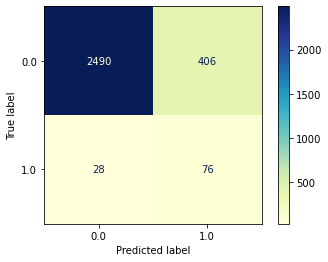

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [84]:
from sklearn.neural_network import MLPClassifier

In [85]:
start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()
log_scores("Multi-layer Perceptron", y_test, y_predictions)

In [86]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2896
         1.0       0.71      0.12      0.20       104

    accuracy                           0.97      3000
   macro avg       0.84      0.56      0.59      3000
weighted avg       0.96      0.97      0.96      3000



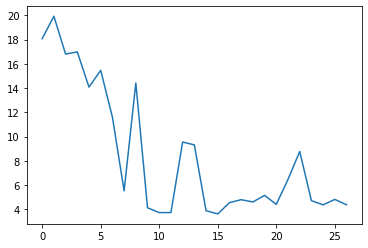

In [87]:
#measuring how well the model is performing
plt.plot(model.loss_curve_)

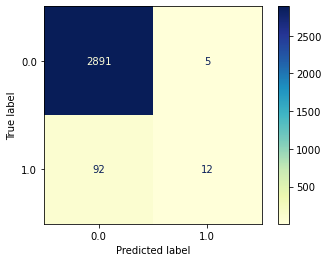

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [90]:
# performance table of each model
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
k-NN,0.959000,0.958044,0.959000,0.958513,0.046429,0.138784
Decision Tree,0.953667,0.968327,0.953667,0.959502,0.103960,0.004309
Gaussian Naive Bayes,0.855333,0.960065,0.855333,0.896942,0.019391,0.003057
Multi-layer Perceptron,0.967667,0.960032,0.967667,0.956282,2.294176,0.006888
